## <center> Explorative Data Analysis - Terrorism </center>

In [1]:
import math
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/globalterrorismdb_0718dist.csv/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.shape

(181691, 135)

In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [10]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
data.loc[:,'Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [12]:
data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [13]:
data.isna()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [14]:
data=data.fillna('Unknown')

In [15]:
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [16]:
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Unknown,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,Unknown,MANO-D,Private Citizens & Property,Unknown,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",Unknown,23rd of September Communist League,Government (Diplomatic),Unknown,Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Unknown,Journalists & Media,Unknown,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.99749,23.762728,Bombing/Explosion,Unknown,Unknown,U.S. Embassy,Unknown,Unknown,Government (Diplomatic),Explosives,Unknown
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Unknown,Unknown,U.S. Consulate,Unknown,Unknown,Government (Diplomatic),Incendiary,Unknown


## Visualization

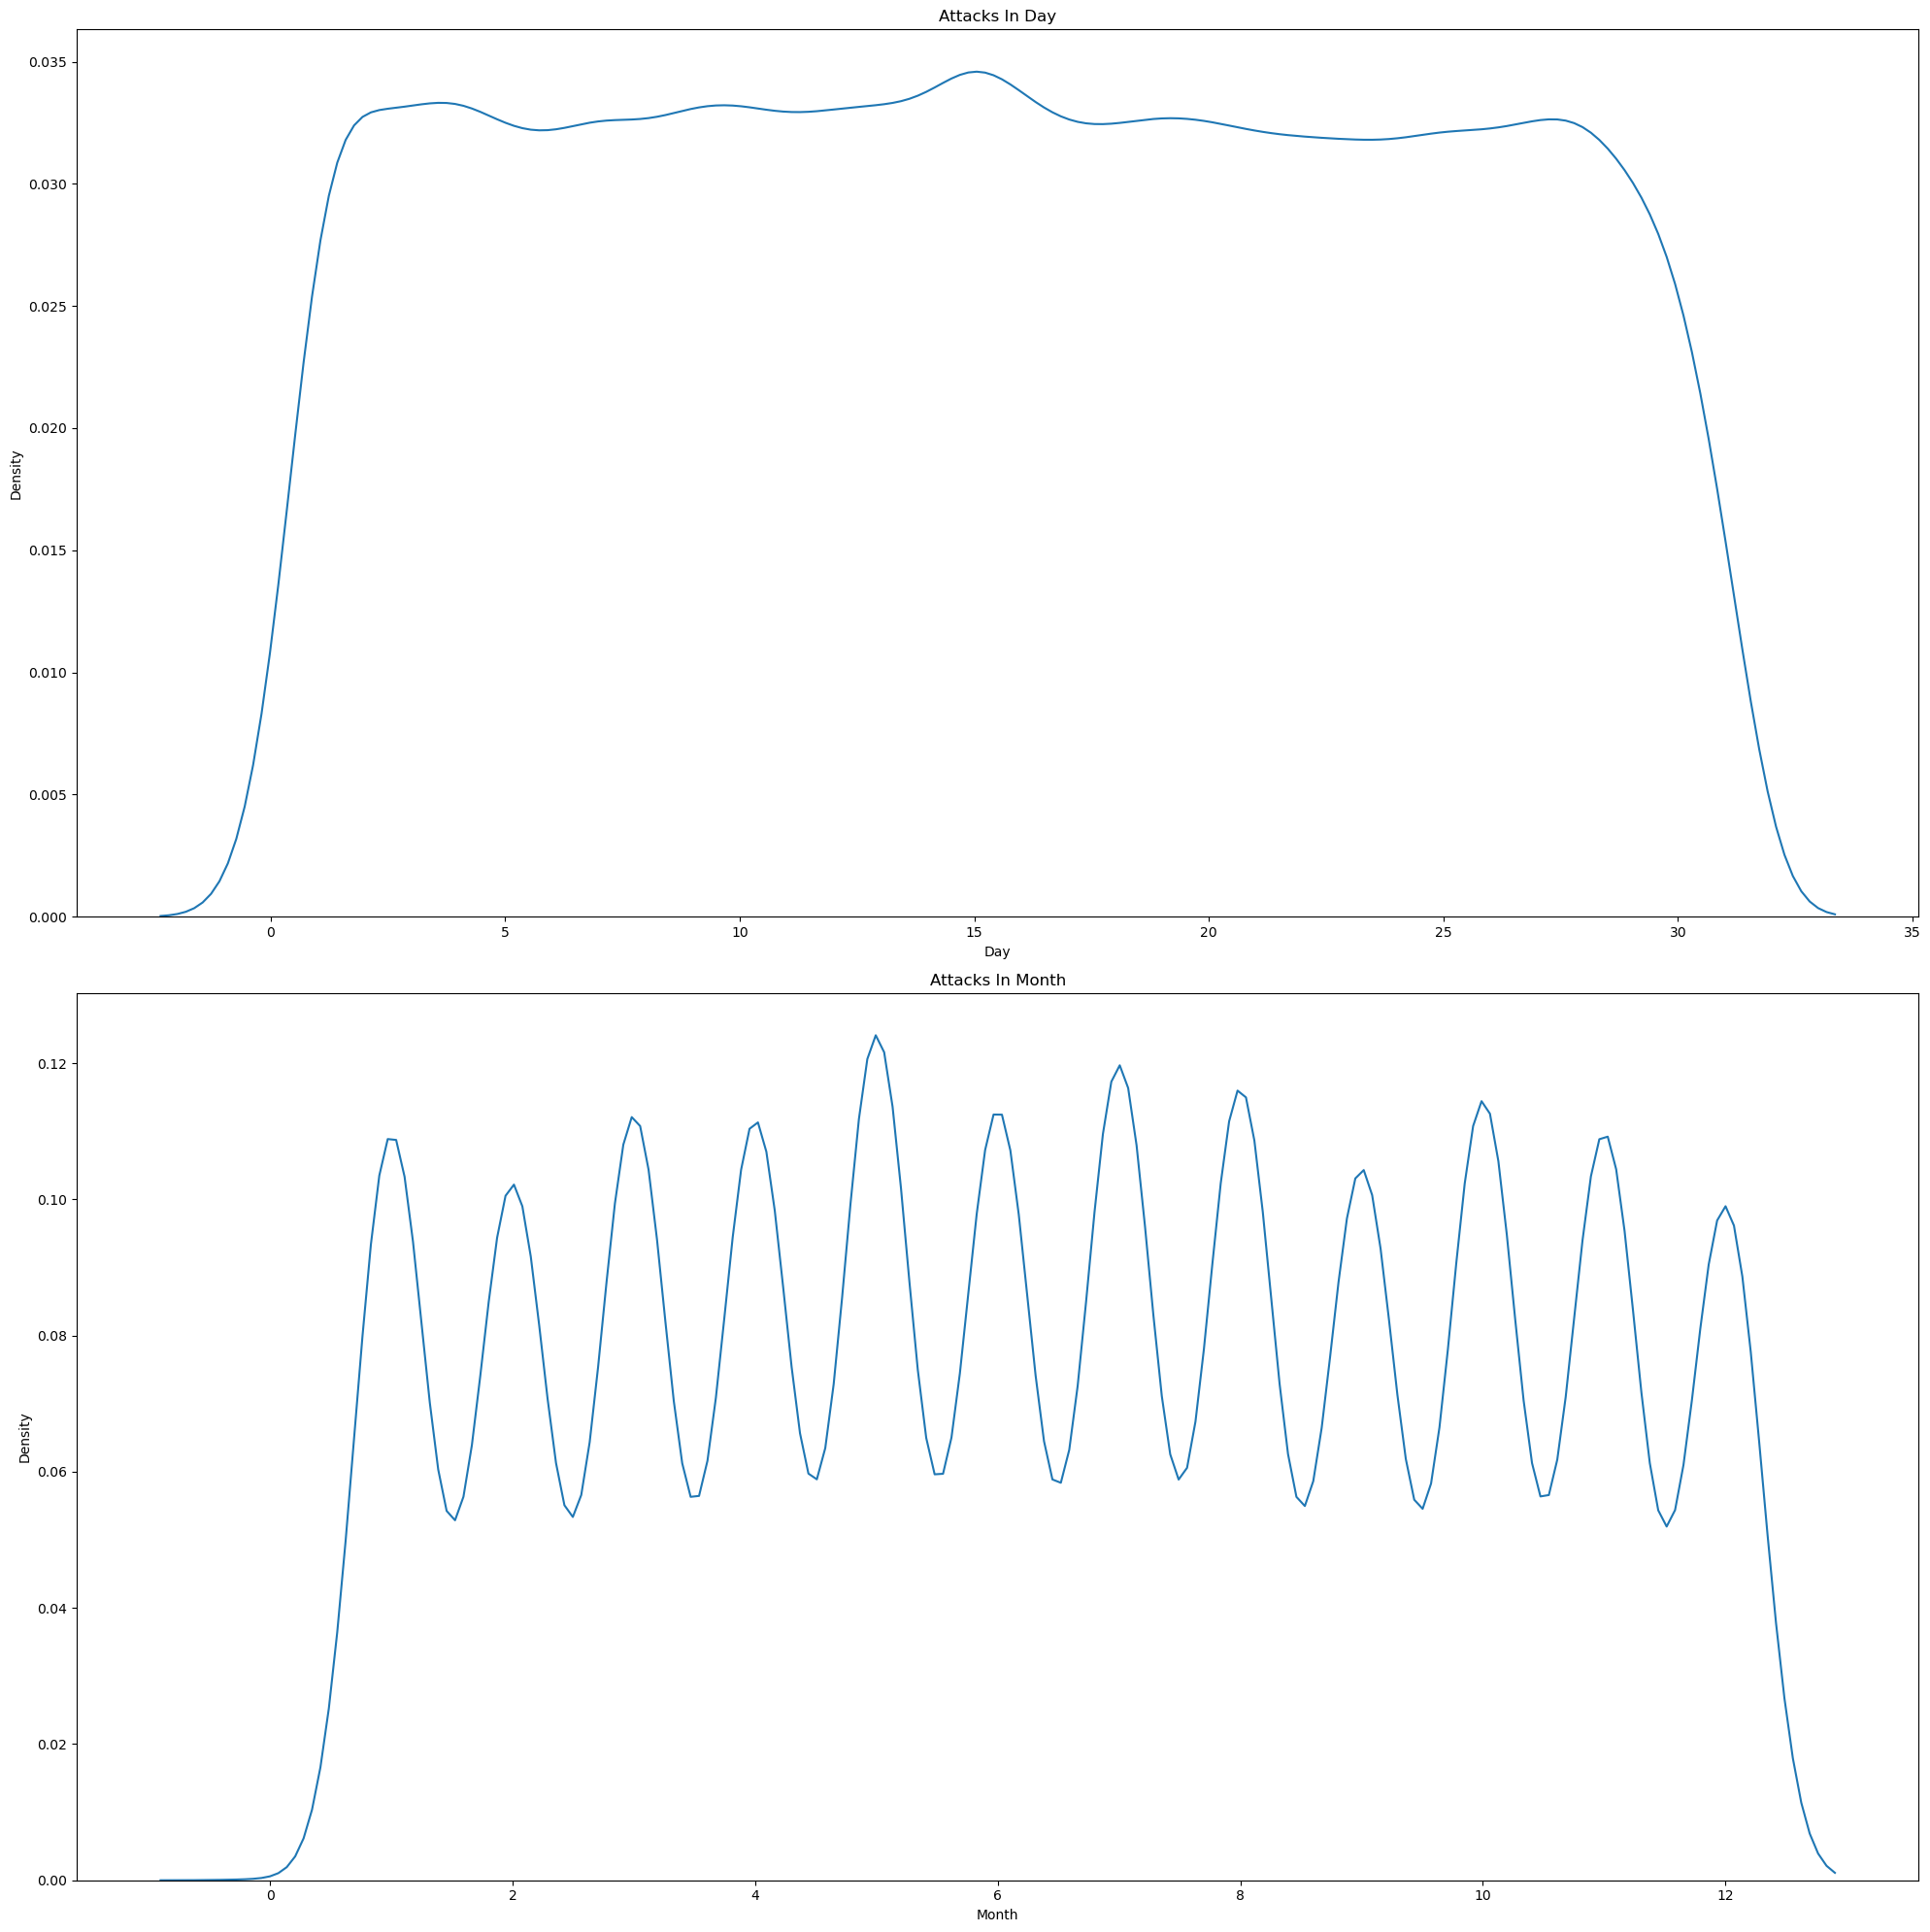

In [17]:
plt.figure(figsize=(20,20))
heading=['Attacks In Day','Attacks In Month']
columns=['Day','Month']
for i,col in enumerate(columns):
  plt.subplot(2,1,i+1)
  plt.title(heading[i])
  sns.kdeplot(x=data[col])
plt.tight_layout()
plt.show()

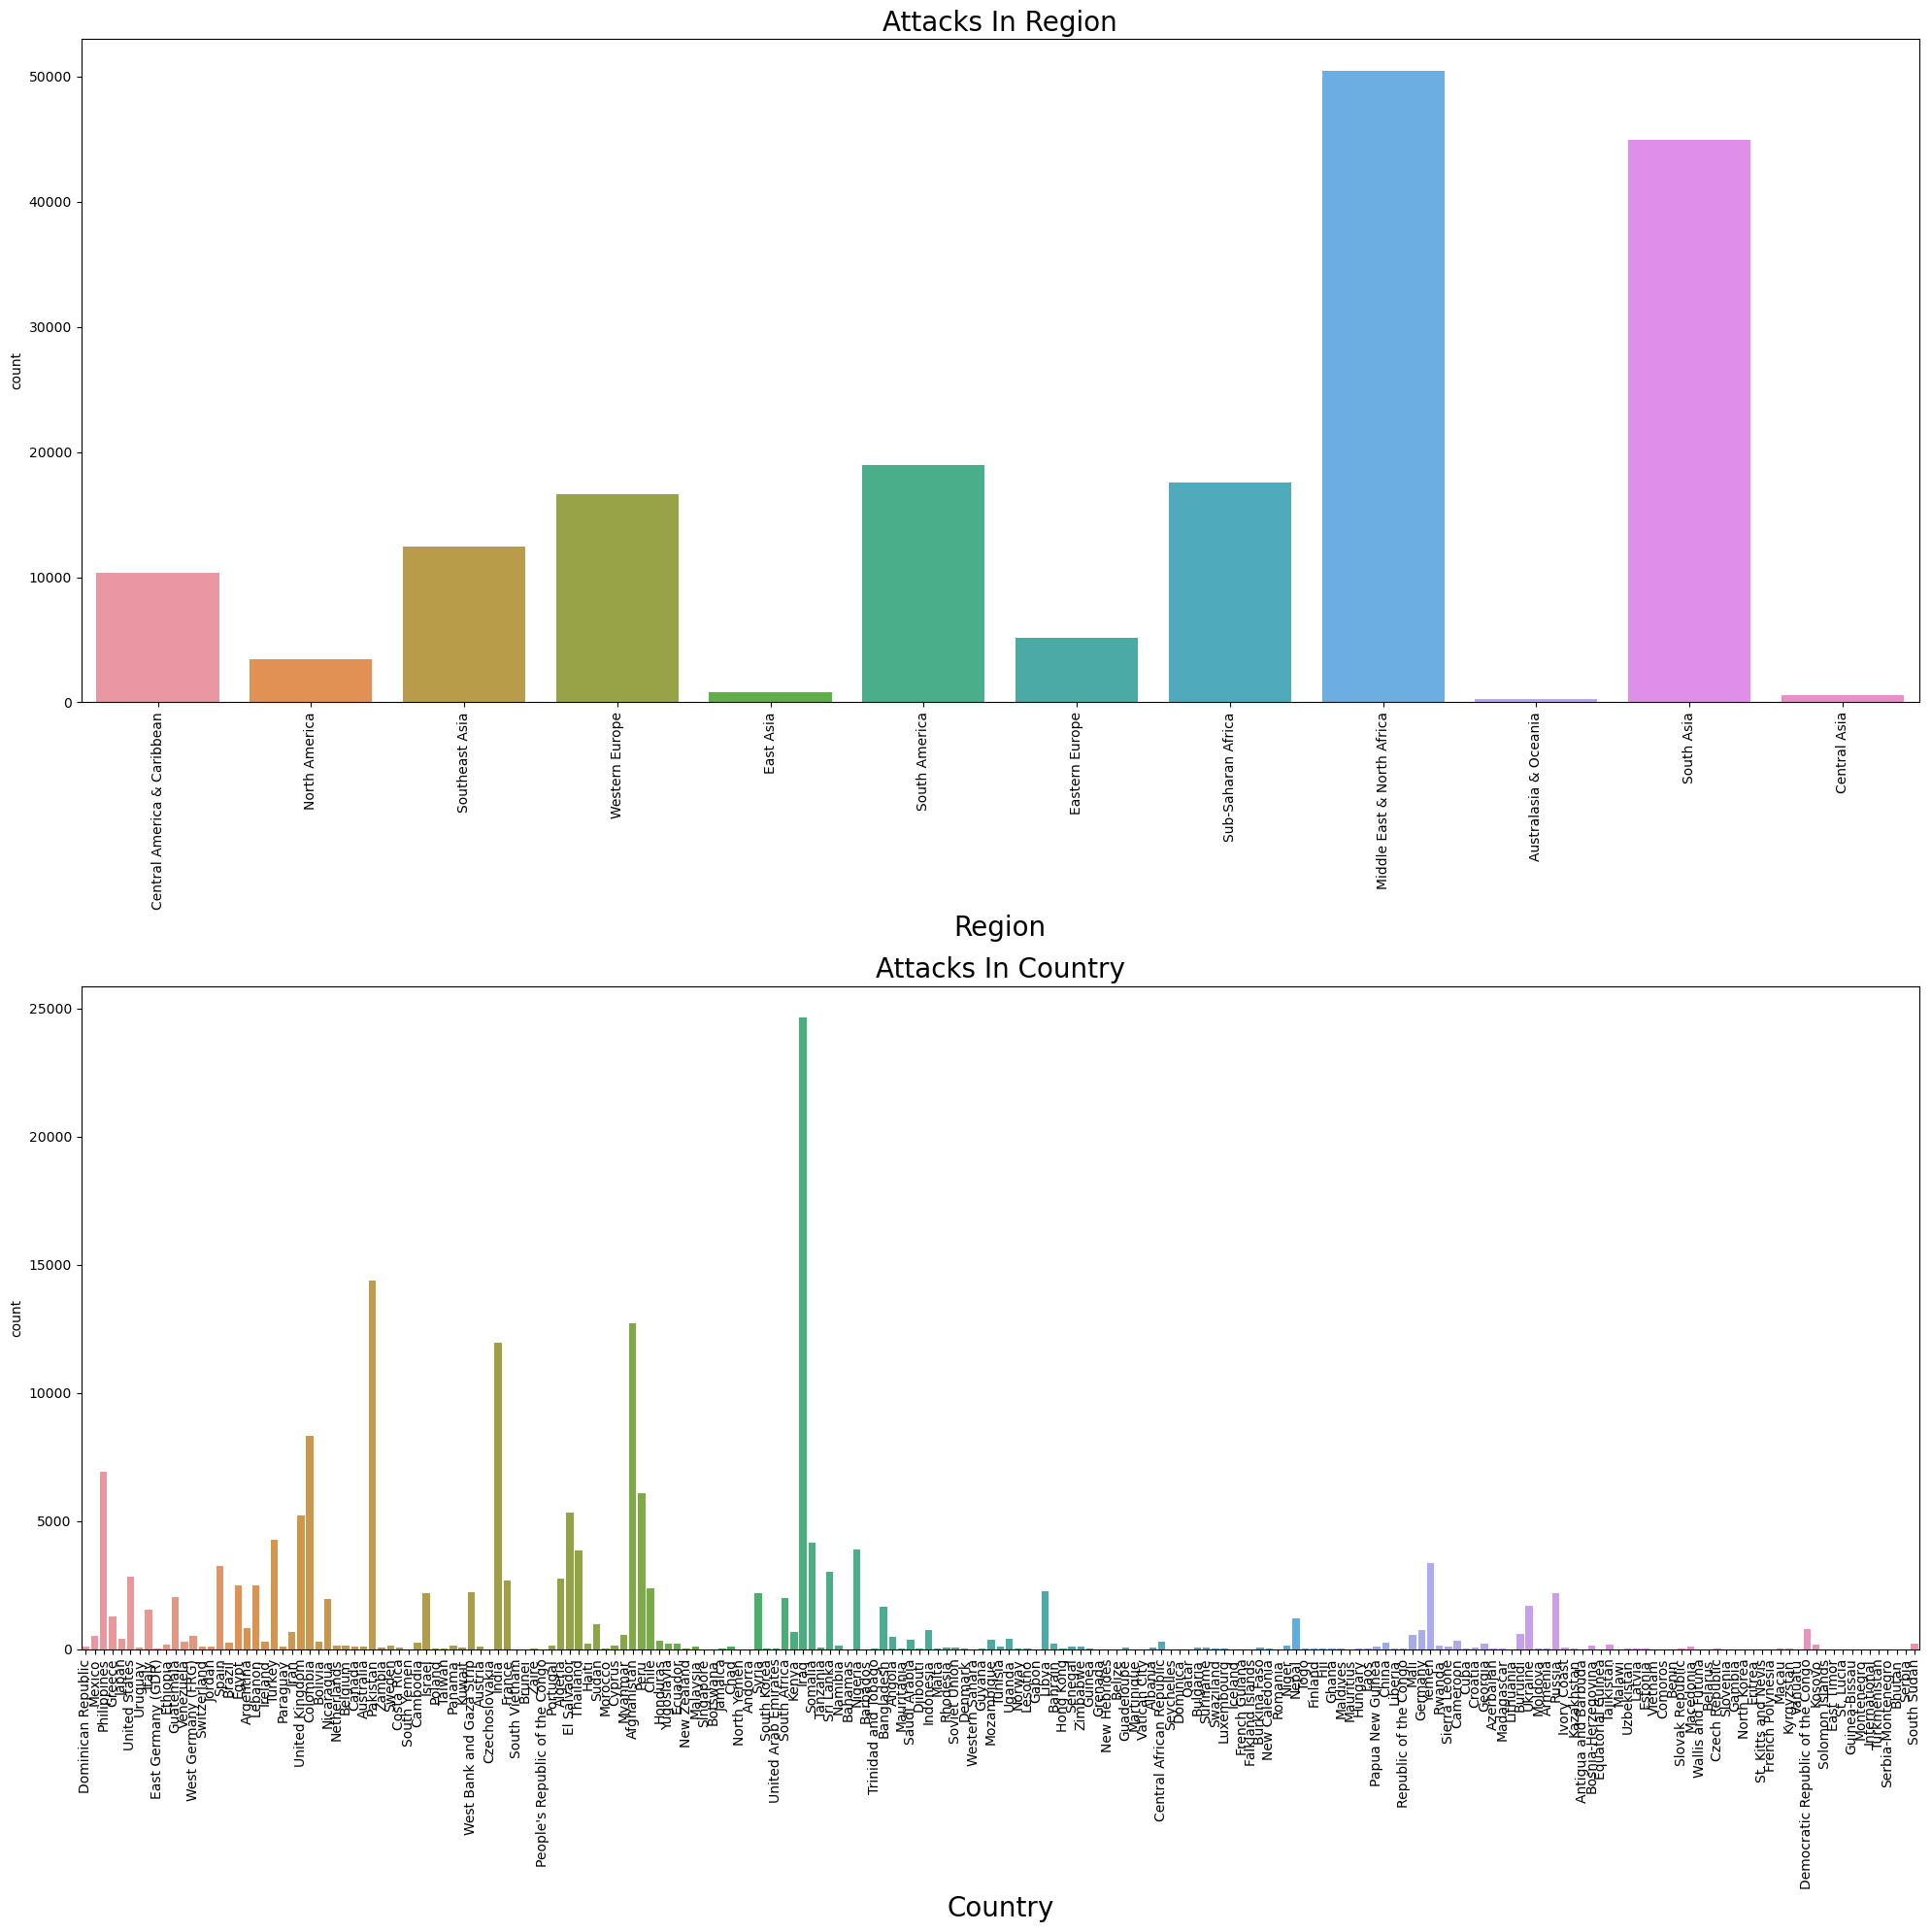

In [18]:
plt.figure(figsize=(20,20))
heading=['Attacks In Region','Attacks In Country']
columns=['Region','Country']
for i,col in enumerate(columns):
  plt.subplot(2,1,i+1)
  plt.title(heading[i],fontsize=20)
  plt.xticks(rotation=90)
  plt.xlabel(col,fontsize=20)
  sns.countplot(x=data[col])
plt.tight_layout()
plt.show()

In [19]:
data.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

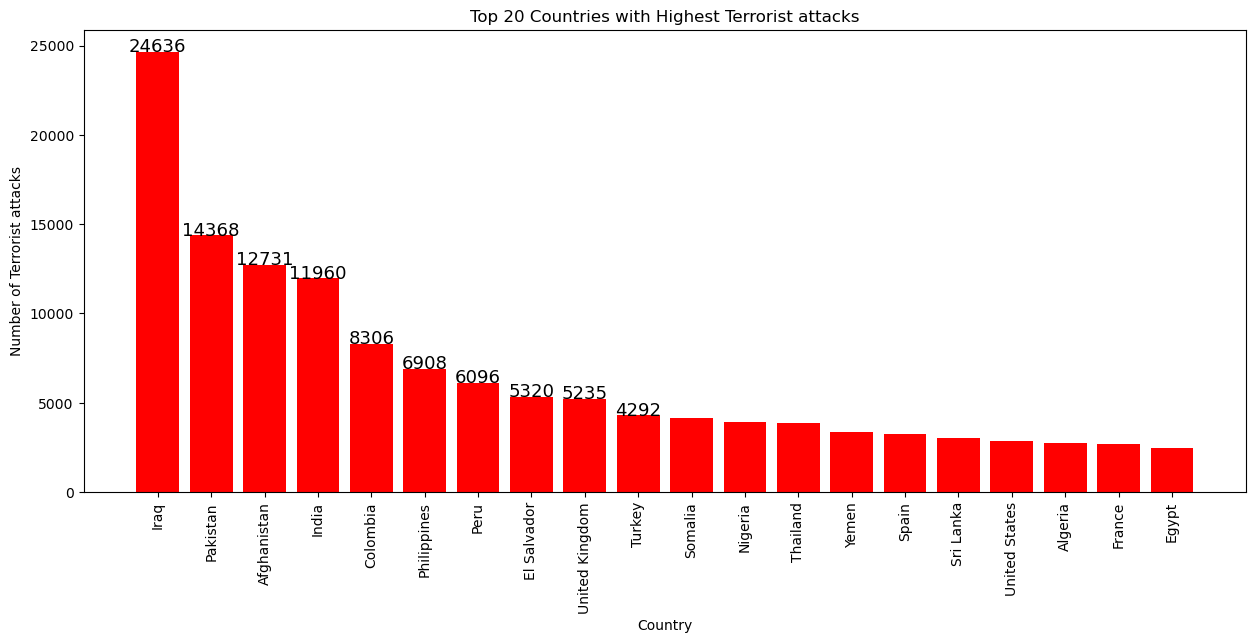

In [20]:
#plotting the top 20 countries with Highest Terrorist attacks

plt.figure(figsize=(15,6))
plt.bar(data.Country.value_counts()[:20].index,data.Country.value_counts()[:20].values,color='Red')
# set the axis labels and title
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 20 Countries with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(data.Country.value_counts()[:10].values):
    plt.text(data.Country.value_counts()[:20].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [21]:
data.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

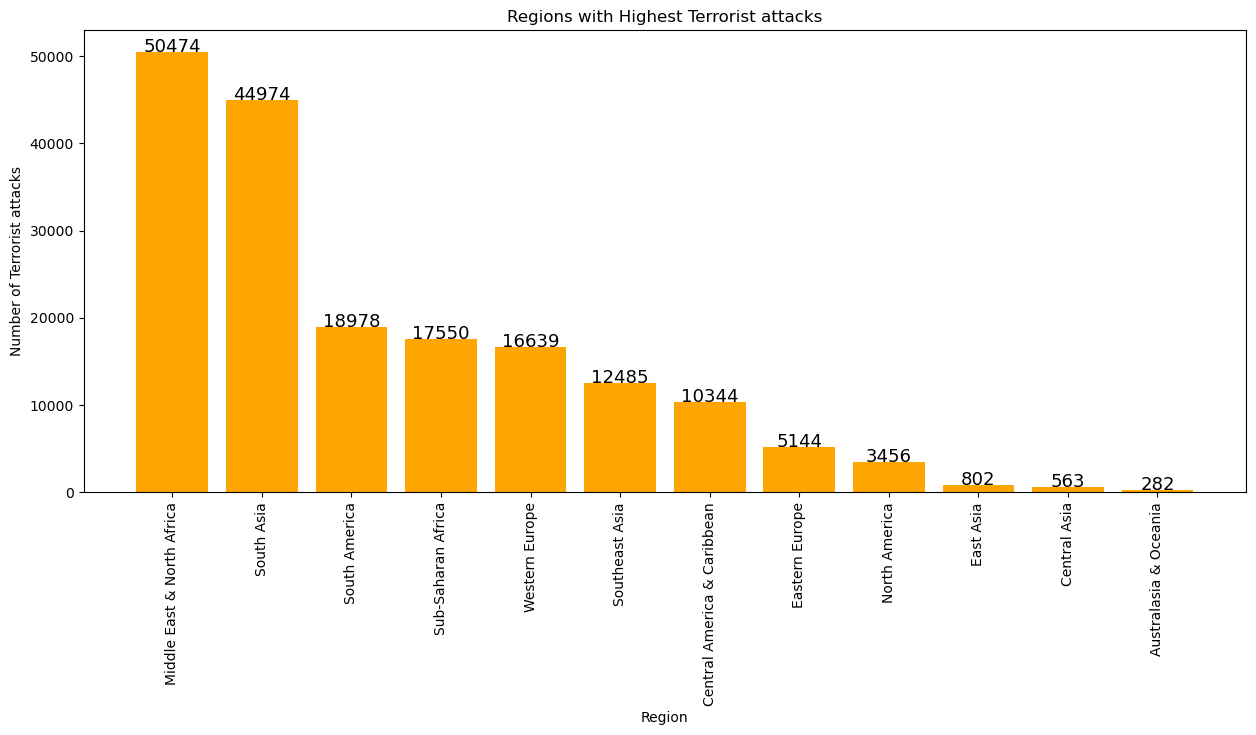

In [22]:
#Plotting the Region with Highest Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(data.Region.value_counts().index,data.Region.value_counts().values,color='orange')
# set the axis labels and title
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(data.Region.value_counts().values):
    plt.text(data.Region.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()
     

In [23]:
data.AttackType.value_counts()     

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

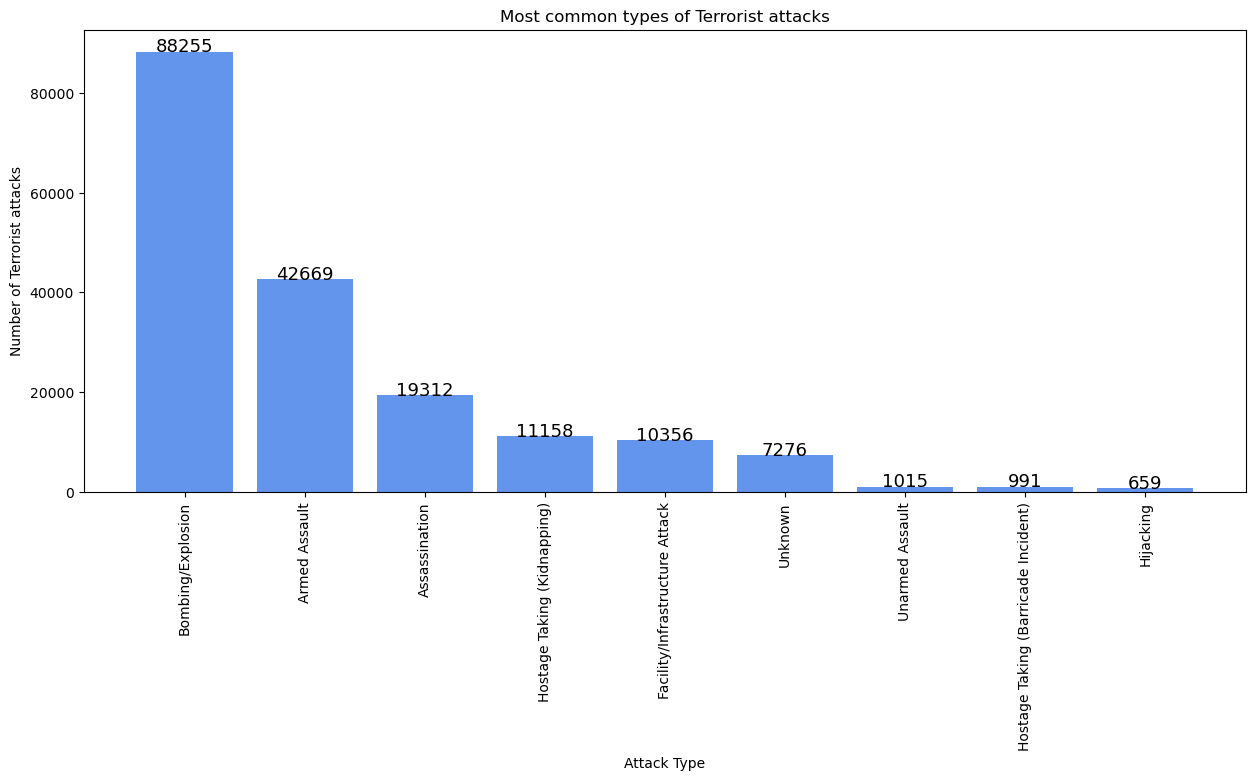

In [24]:
#Plotting the Common types of Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(data.AttackType.value_counts().index,data.AttackType.value_counts().values,color='cornflowerblue')
# set the axis labels and title
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(data.AttackType.value_counts().values):
    plt.text(data.AttackType.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()
     

## Destructive Feature of data

In [31]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) 
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())
print("Most Targeted:",data['Target'].value_counts().index[1])

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Most Targeted: Civilians


In [32]:
data['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# DATA VISUALISATION

## Number of Terrorist Activities each Year

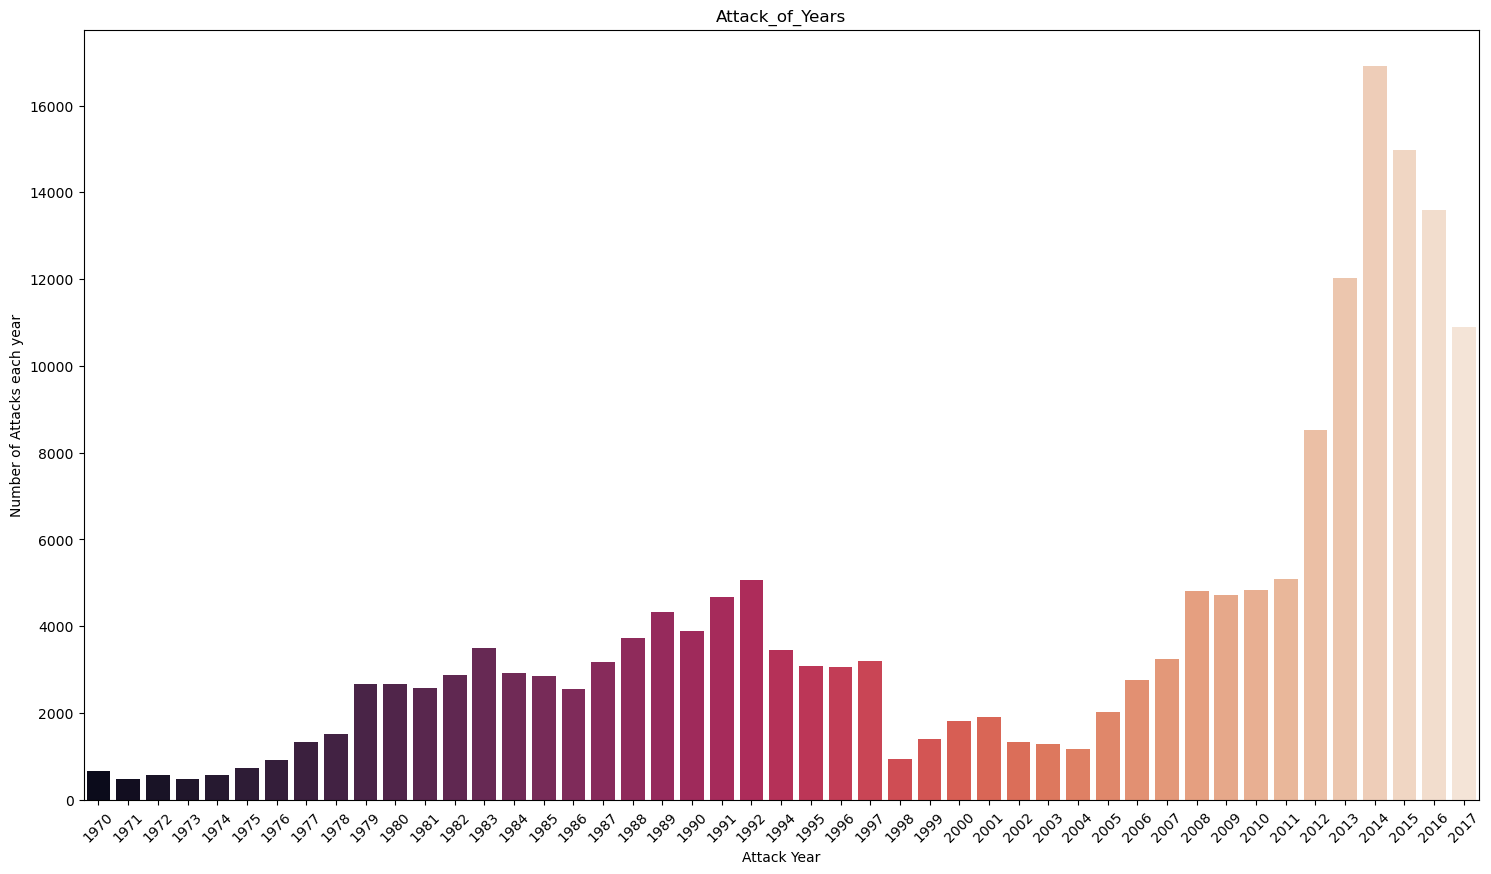

In [33]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

## Terrorist Activities by Region in each year

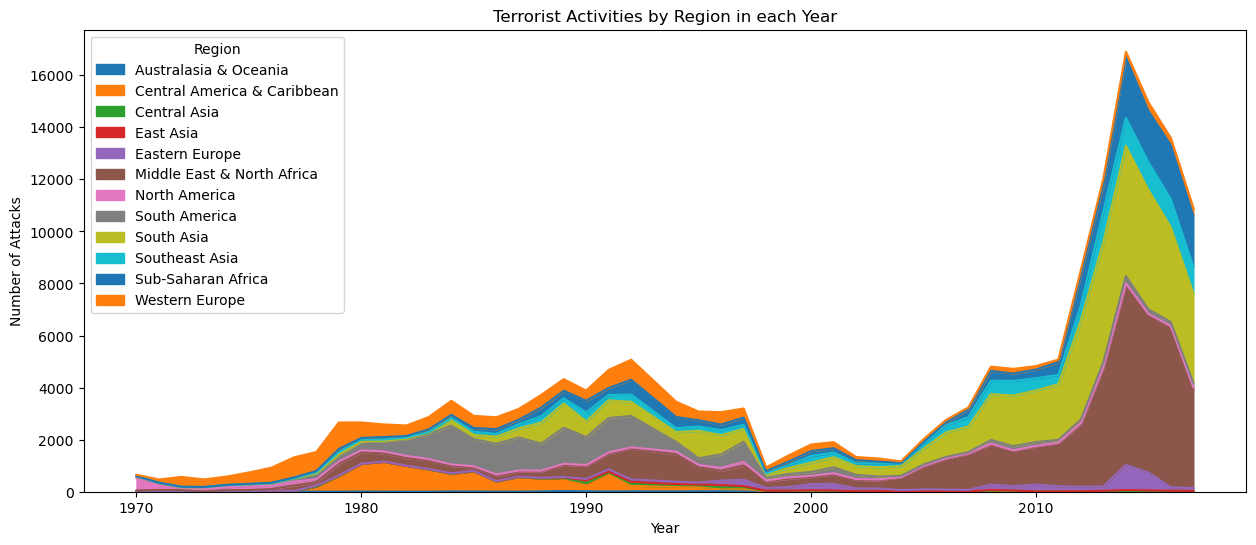

In [34]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()